## t-distributed Stochastic Neighbor Embedding.
t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In [1]:
from gensim.models import Word2Vec, KeyedVectors
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore')

In [4]:
# load the wikipedia model
model_cbow = Word2Vec.load('model/wiki_cbow.bin')

In [5]:
#Preprocessing our models vocabulary to make better visualizations
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab= list(model_cbow.wv.vocab)#all the words in the vocabulary. 
print("\nSize of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:30])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("\nSize of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Size of Vocabulary: 13588
Few words in Vocabulary ['text', 'albert', 'of', 'prussia', 'may', 'march', 'was', 'the', 'last', 'grand', 'master', 'teutonic', 'knights', 'who', 'after', 'converting', 'to', 'became', 'first', 'monarch', 'duchy', 'state', 'that', 'emerged', 'from', 'former', 'monastic', 'european', 'ruler', 'establish']

Size of Vocabulary without stopwords: 13222
Few words in Vocabulary without stopwords ['text', 'albert', 'prussia', 'may', 'march', 'last', 'grand', 'master', 'teutonic', 'knights', 'converting', 'became', 'first', 'monarch', 'duchy', 'state', 'emerged', 'former', 'monastic', 'european', 'ruler', 'establish', 'official', 'religion', 'lands', 'proved', 'instrumental', 'political', 'spread', 'early']


In [6]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_cbow.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_cbow[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [7]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [ 1.6085818   0.8188126   1.2752653  -0.30121428  1.5402384   0.6517211
 -0.41082737  0.40540567 -0.02710598 -0.30645642 -0.06083928 -0.8215062
  0.49470785  2.9432828  -0.5572167  -0.05625491  0.5873177  -0.1924203
 -1.3301052   0.10763815 -0.8698807   0.31649363  0.6657233   0.9655507
  0.6450842  -1.6304861   0.4027822  -0.02959191 -0.79250777 -1.8264621
 -0.90964246 -1.6414634  -1.217859    0.53498876  1.7770507  -1.0964563
 -0.65453684 -0.15611057  1.1619232   0.1958976   0.801674    1.3682253
  1.8622032   0.14257592 -0.94145656  0.64022803  1.4724869  -0.8569631
  1.5422037   1.2803997   0.5080475  -0.4999654  -0.8346204  -0.5150392
 -0.43590966 -1.1252253  -0.27844808  0.92661667 -0.02875334  1.2808839
 -0.08776696 -1.503566   -1.2957593  -0.25361672 -0.4276911  -0.6803484
  0.3315387   0.72189426  0.23825045  1.347499   -0.01021538 -0.7916425
 -1.0086108   1.2068928  -2.144598    0.34440166 -0.6679102   0.3150248
 -0.40844774 -0.10267656 -0.32336628 -0.5404

In [8]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

## Hyperparameters of TSNE
1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

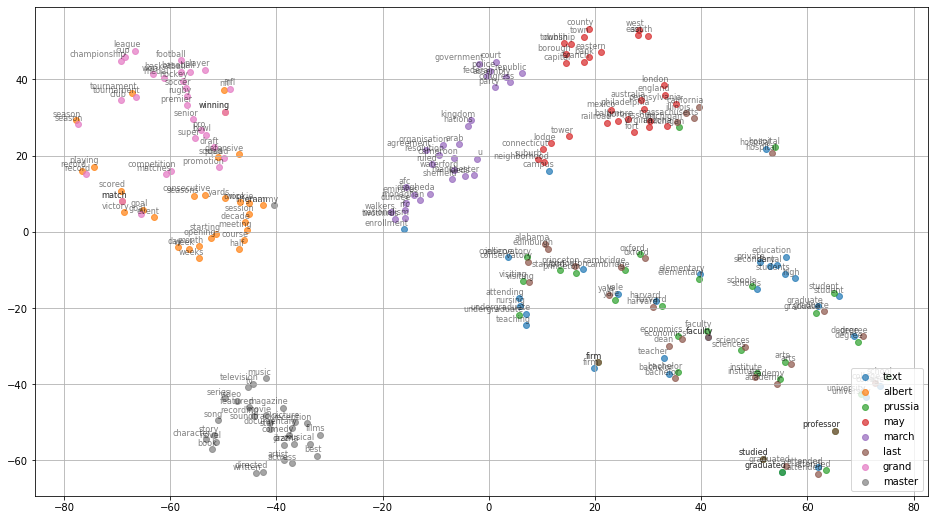

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

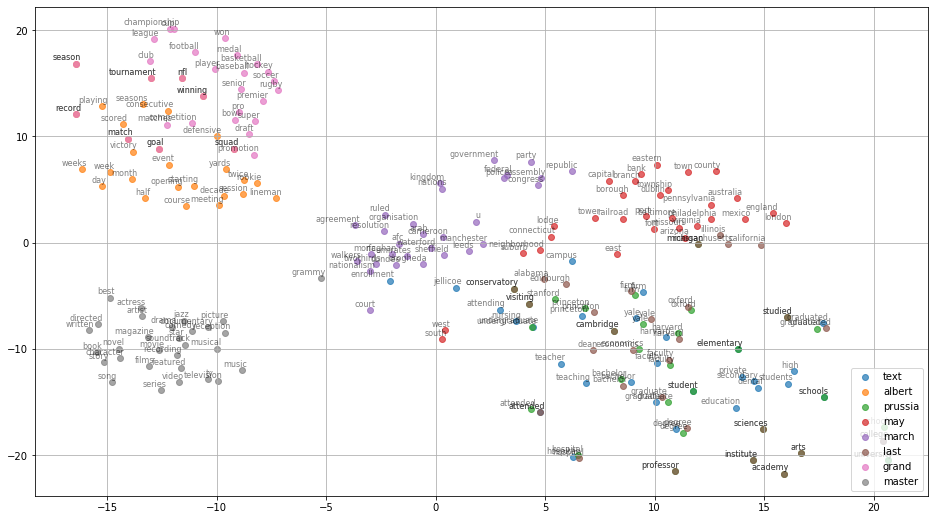

In [10]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

Take a look at the above 2 graphs. We cannto say a higher or lower perplexity is good. It depends on the problem at hand. Here the plots of perplexity 5,10 are much better defined than the one with 25